# Take grayscale image of size 512x512, add some Gaussian noise and perform the following operations in frequency domain –

(a) Apply 4th order Butterworth and Gaussian low pass filter to analyze their performance quantitatively

(b) Observe the ringing effect of ideal low pass filter on the image. Use different radius (D0) of ideal low pass filter and display their results

(c) Perform edge detection of given the noise and clean image using ideal and Gaussian high pass filters.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def psnr(original, processed):
    mse = np.mean((original - processed) ** 2)
    if mse == 0:
        return float('inf')  # No error → Infinite PSNR
    max_pixel = 255.0
    psnr = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr

In [3]:
def fft_image(img):
    return np.fft.fftshift(np.fft.fft2(img))

def ifft_image(f_img):
    return np.abs(np.fft.ifft2(np.fft.ifftshift(f_img)))

In [4]:
# Load image and add Gaussian noise
img = cv2.imread("Characters_Test_Pattern.tif", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (512, 512))
noisy_img = img + np.random.normal(0, 20, img.shape)
noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)

# FFT of noisy image
f_img = fft_image(noisy_img)

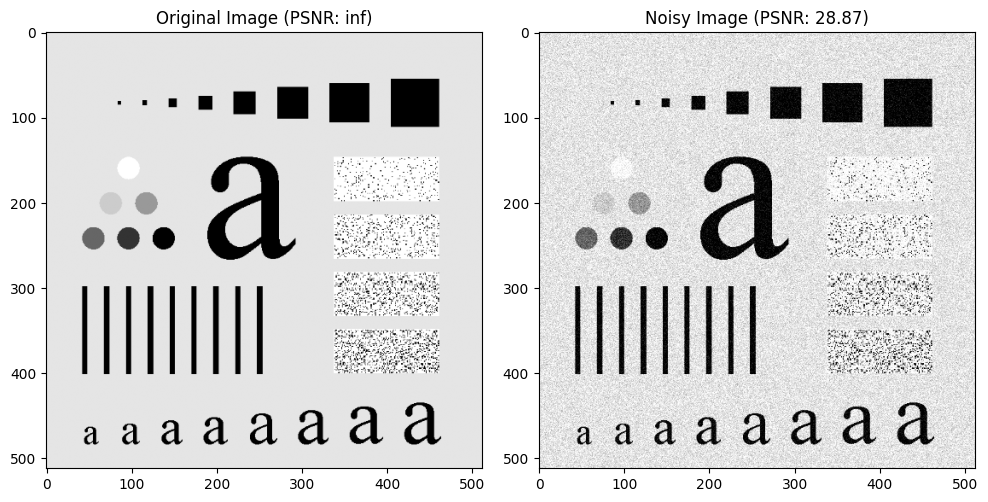

In [5]:
# Plot original and noisy images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), 
plt.imshow(img, cmap='gray'), 
plt.title(f'Original Image (PSNR: {psnr(img, img):.2f})')

plt.subplot(1,2,2), 
plt.imshow(noisy_img, cmap='gray'), 
plt.title(f'Noisy Image (PSNR: {psnr(img, noisy_img):.2f})')
plt.tight_layout()
plt.show()

In [6]:
def gaussian_low_pass(shape, D0):
    P, Q = shape
    u = np.arange(0, P) - P // 2
    v = np.arange(0, Q) - Q // 2
    U, V = np.meshgrid(u, v, indexing='ij')
    D = np.sqrt(U**2 + V**2)
    return np.exp(-(D**2) / (2 * D0**2))

def gaussian_high_pass(shape, D0):
    return 1 - gaussian_low_pass(shape, D0)

In [7]:
# Butterworth low-pass filter
def butterworth_low_pass(shape, D0, n):
    P, Q = shape
    u = np.arange(0, P) - P // 2
    v = np.arange(0, Q) - Q // 2
    U, V = np.meshgrid(u, v, indexing='ij')
    D = np.sqrt(U**2 + V**2)
    return 1 / (1 + (D / D0)**(2 * n))

In [8]:
def ideal_low_pass(shape, D0):
    P, Q = shape
    u = np.arange(0, P) - P // 2
    v = np.arange(0, Q) - Q // 2
    U, V = np.meshgrid(u, v, indexing='ij')
    D = np.sqrt(U**2 + V**2)
    return np.where(D <= D0, 1, 0)

def ideal_high_pass(shape, D0):
    return 1 - ideal_low_pass(shape, D0)


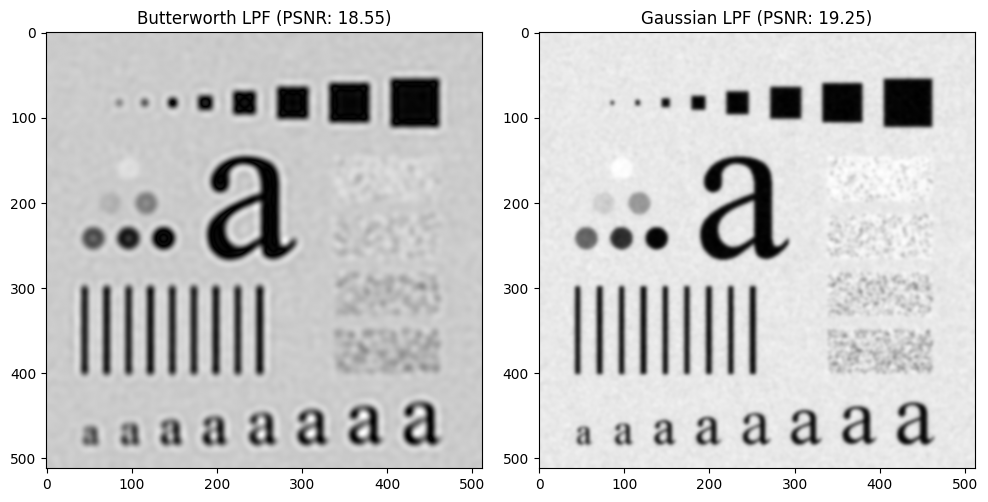

In [9]:
# (a) Butterworth & Gaussian LPF
butter_filter = butterworth_low_pass(img.shape, D0=40, n=4)
gauss_filter = gaussian_low_pass(img.shape, D0=40)

butter_filtered = ifft_image(f_img * butter_filter)
gauss_filtered = ifft_image(f_img * gauss_filter)

# Show result
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), 
plt.imshow(butter_filtered, cmap='gray'), 
plt.title(f'Butterworth LPF (PSNR: {psnr(img, butter_filtered):.2f})')

plt.subplot(1,2,2), 
plt.imshow(gauss_filtered, cmap='gray'), 
plt.title(f'Gaussian LPF (PSNR: {psnr(img, gauss_filtered):.2f})')
plt.tight_layout()
plt.show()

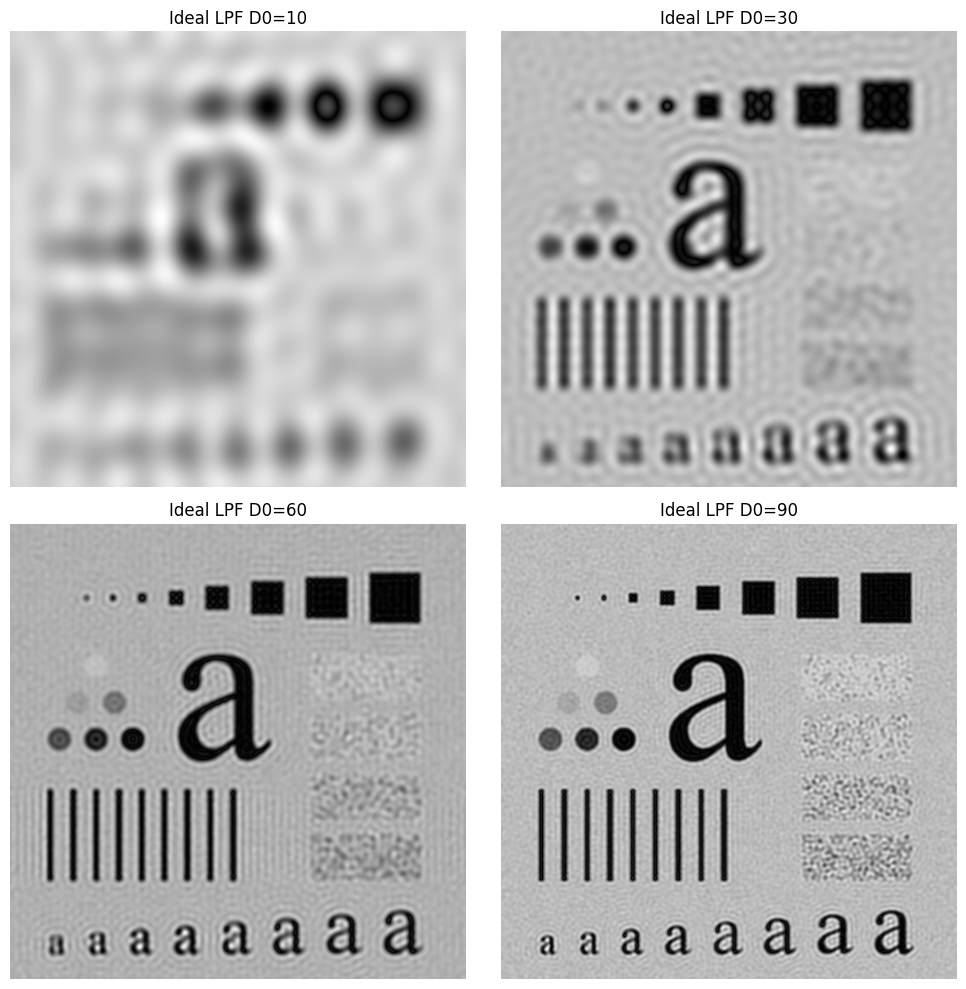

In [10]:
# (b) Ringing with Ideal LPF
# ringing effect obsereved when cutoff is too low

i =1
plt.figure(figsize=(10,10))
for D0 in [10, 30, 60, 90]:
    ideal_filter = ideal_low_pass(img.shape, D0)
    result = ifft_image(f_img * ideal_filter)
    plt.subplot(2, 2, i)
    plt.imshow(result, cmap='gray')
    plt.title(f'Ideal LPF D0={D0}')
    plt.axis('off')
    i += 1
plt.tight_layout()
plt.show()

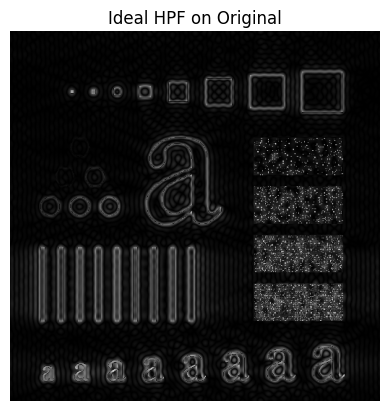

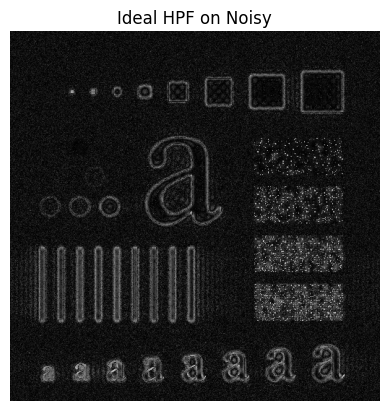

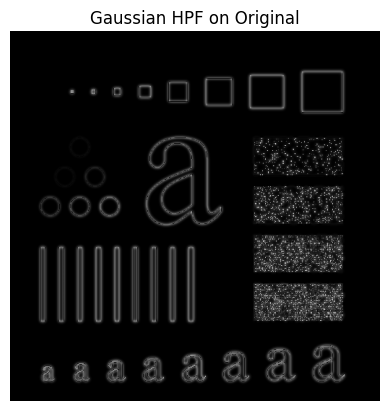

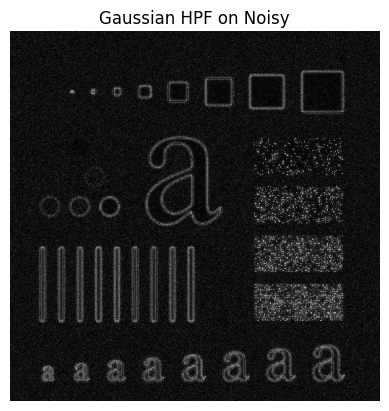

In [11]:
# (c) Edge detection with HPFs
for name, hpf_func in [("Ideal", ideal_high_pass), ("Gaussian", gaussian_high_pass)]:
    for source, label in [(img, "Original"), (noisy_img, "Noisy")]:
        f = fft_image(source)
        hpf = hpf_func(source.shape, D0=40)
        result = ifft_image(f * hpf)
        plt.imshow(result, cmap='gray')
        plt.title(f'{name} HPF on {label}')
        plt.axis('off')
        plt.show()

In [12]:
# plt.hist(noisy_img.ravel(), bins=256, range=(0, 255), color='gray')
# plt.title("Histogram of Noisy Image")
# plt.xlabel("Pixel Intensity")
# plt.ylabel("Frequency")
# plt.show()


In [13]:
def complement(image):
    return [[1 - pixel for pixel in row] for row in image]

In [14]:
# # (c) Edge detection with HPFs
# for name, hpf_func in [("Ideal", ideal_high_pass), ("Gaussian", gaussian_high_pass)]:
#     for source, label in [(img, "Original"), (noisy_img, "Noisy")]:
#         f1 = fft_image(source)
#         hpf1 = hpf_func(source.shape, D0=40)
#         result1 = ifft_image(f1 * hpf1)
#         result_complement = complement(result1)
#         plt.imshow(result_complement, cmap='gray')
#         plt.title(f'{name} HPF on {label}')
#         plt.axis('off')
#         plt.show()